# Part 1 : TensorFlow ---------------------------------------------------------

In [46]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tn


# Step 1 : import the dataset

In [47]:

data = pd.read_csv('diabetes.csv')
data.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

In [48]:
# We dont have column names, so adding header to them
data = data.set_axis(['fr1','fr2','fr3','fr4','fr5','fr6','fr7','fr9','target'],axis=1)

# Step 2: Preprocessing the Data & Visualization

In [49]:
data.head()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [50]:
data.describe()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# to check is is there any duplicate rows
data.duplicated().sum()

0

In [52]:
data.isnull().sum()

fr1       0
fr2       0
fr3       0
fr4       0
fr5       0
fr6       0
fr7       0
fr9       0
target    0
dtype: int64

In [53]:
data.shape

(758, 9)

array([[<Axes: title={'center': 'fr1'}>, <Axes: title={'center': 'fr2'}>,
        <Axes: title={'center': 'fr3'}>],
       [<Axes: title={'center': 'fr4'}>, <Axes: title={'center': 'fr5'}>,
        <Axes: title={'center': 'fr6'}>],
       [<Axes: title={'center': 'fr7'}>, <Axes: title={'center': 'fr9'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

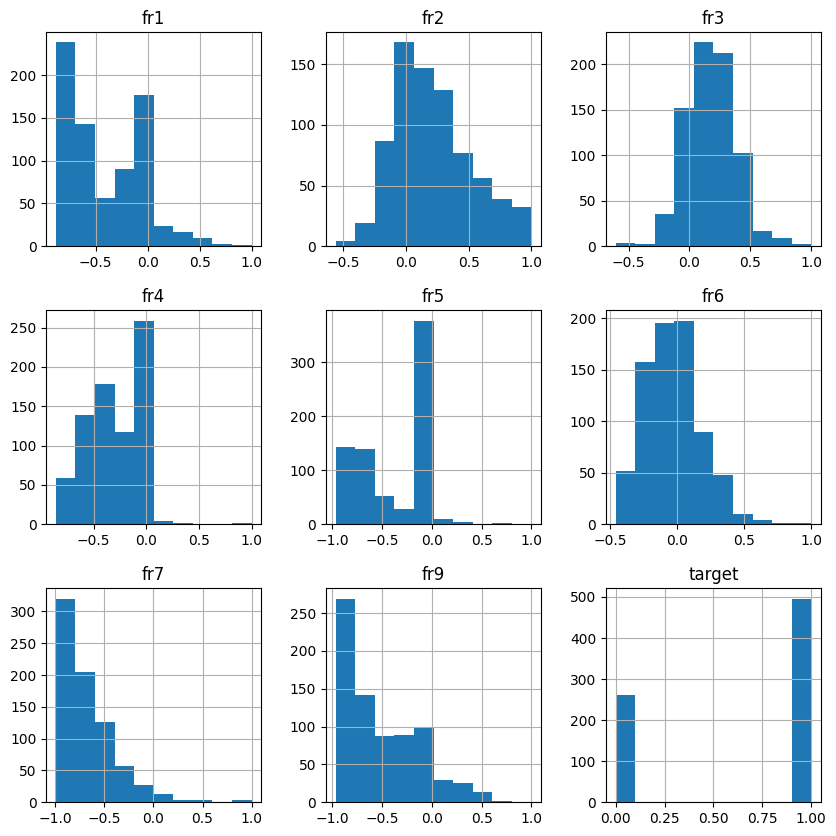

In [54]:
# visualizations of each data field
data.hist(figsize=(10,10))

<Axes: >

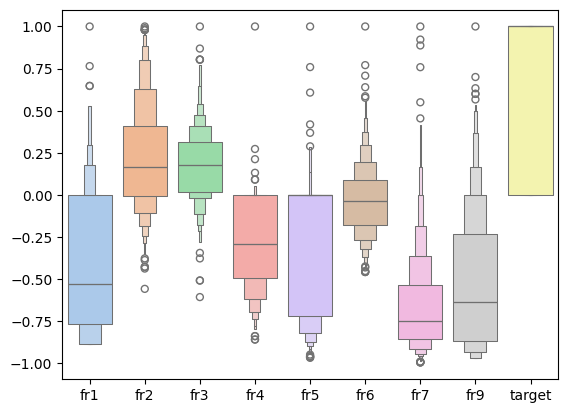

In [55]:
# Box plot to identify outliers
import seaborn as sns
sns.boxenplot(data=data,palette='pastel')

<Axes: >

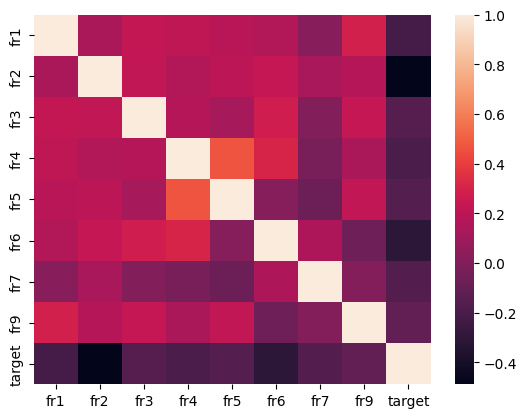

In [56]:
# heapMap to check Correlation of data points 
sns.heatmap(data.corr())

# Step 3: Split into 70% train 30% test

In [57]:
# Data needs to be scaled.

from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_trained_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


x_trained_scaled

# Step 4: Modify the model 

In [60]:
# Now we will apply Keras for 

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [61]:
# Creating Object 
model = Sequential()

In [62]:
model.add(Dense(3,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Here, we can see how many weights and bias are given to each layer
model.summary()

# for better performance and acuracy while compile time we will declare loss_function and Optimizers
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

# Step 5:  Train the model on the data

In [63]:
# we willl store all the values of 'accuracy' & 'loss' in a variable to plot graph of loss and Accuracy
acc_loss_model = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

Epoch 1/20


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6918 - loss: 0.6263 - val_accuracy: 0.6038 - val_loss: 0.6793
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6804 - loss: 0.6174 - val_accuracy: 0.6038 - val_loss: 0.6756
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6800 - loss: 0.6308 - val_accuracy: 0.6038 - val_loss: 0.6723
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - loss: 0.6394 - val_accuracy: 0.6038 - val_loss: 0.6690
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.6352 - val_accuracy: 0.6038 - val_loss: 0.6661
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 0.6379 - val_accuracy: 0.6038 - val_loss: 0.6630
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - loss: 0.6239 - val_accuracy: 0.6038 - val_loss: 0.6604
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6818 - loss: 0.6213 - val_accuracy: 0.6038 - val_loss: 0.6580
Epo

# Step 6 : Model is ready for prediction

In [64]:
y_pred_data = model.predict(x_test_scaled)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


# Step 7: Accuracy Calculation

In [65]:
from sklearn.metrics import accuracy_score

# Now, This is out task to convert prediction value in 0 & 1. for that we will apply condition, 
# if probability is > 0.5 then 1 (cutomer will leave the bank) , other wise 0 (cutomer will not leave the bank) 

y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

Accuracy of the ANN is :  67.10526315789474 %


# Difference of loss_value between training and testing phase

In [66]:
acc_loss_model.history

{'accuracy': [0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374],
 'loss': [0.6388661861419678,
  0.6363179683685303,
  0.6339478492736816,
  0.6318491697311401,
  0.6298217177391052,
  0.6278906464576721,
  0.6259347796440125,
  0.6240974068641663,
  0.6224101781845093,
  0.620717465877533,
  0.6190714836120605,
  0.6175509095191956,
  0.6161544919013977,
  0.6145533919334412,
  0.6130471229553223,
  0.6116153001785278,
  0.6102689504623413,
  0.6089183688163757,
  0.6075901985168457,
  0.6063217520713806],
 'val_accuracy': [0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879,
  0.6037735939025

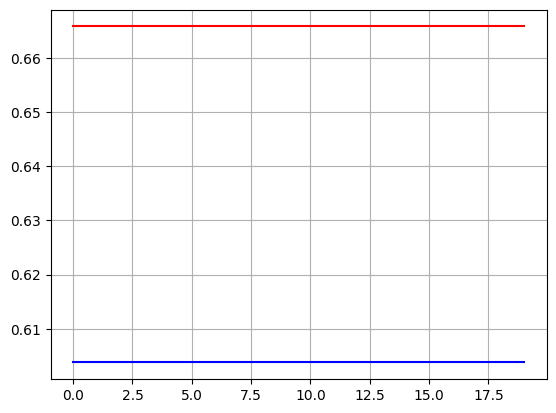

In [67]:
plt.plot(acc_loss_model.history['accuracy'],color='Red')
plt.plot(acc_loss_model.history['val_accuracy'],color='blue')
plt.grid()

# Step 8: Hypothesize

# 1) Changing the number of layers 

In [68]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(3,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(3,activation='sigmoid')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6882 - loss: 0.6131 - val_accuracy: 0.6038 - val_loss: 0.6667
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6921 - loss: 0.6089 - val_accuracy: 0.6038 - val_loss: 0.6662
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.6230 - val_accuracy: 0.6038 - val_loss: 0.6656
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6351 - loss: 0.6481 - val_accuracy: 0.6038 - val_loss: 0.6650
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - loss: 0.6329 - val_accuracy: 0.6038 - val_loss: 0.6645
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6945 - loss: 0.6055 - val_accuracy: 0.6038 - val_loss: 0.6642
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - loss: 0.6155 - val_accuracy: 0.6038 - val_loss: 0.6637
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 0.6394 - val_accuracy: 0.6038 - val_loss: 0.6628
Epo

{'accuracy': [0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374],
 'loss': [0.6279529333114624,
  0.6273193955421448,
  0.6267856359481812,
  0.6263119578361511,
  0.6257257461547852,
  0.6252058148384094,
  0.6245786547660828,
  0.6240028142929077,
  0.6234189867973328,
  0.6227716207504272,
  0.6221643090248108,
  0.621469259262085,
  0.6208722591400146,
  0.6201517581939697,
  0.6194518208503723,
  0.6187795400619507,
  0.6180415153503418,
  0.6174046397209167,
  0.616659939289093,
  0.6158441305160522],
 'val_accuracy': [0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879,
  0.60377359390258

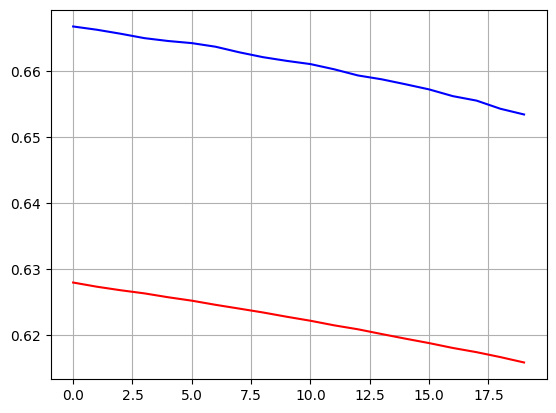

In [69]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by adding additional layer on Neural network we achive around 0.64 of loss while training we achived 0.61.

# 2) Changing number of Dense

In [70]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='sigmoid')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6589 - loss: 0.6640 - val_accuracy: 0.6038 - val_loss: 0.6822
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 0.6563 - val_accuracy: 0.6038 - val_loss: 0.6814
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - loss: 0.6462 - val_accuracy: 0.6038 - val_loss: 0.6810
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6475 - loss: 0.6583 - val_accuracy: 0.6038 - val_loss: 0.6803
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7031 - loss: 0.6283 - val_accuracy: 0.6038 - val_loss: 0.6801
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.6557 - val_accuracy: 0.6038 - val_loss: 0.6794
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - loss: 0.6490 - val_accuracy: 0.6038 - val_loss: 0.6791
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.6574 - val_accuracy: 0.6038 - val_loss: 0.6783
Epo

{'accuracy': [0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374],
 'loss': [0.6593095064163208,
  0.6551197171211243,
  0.6521150469779968,
  0.649248480796814,
  0.647713303565979,
  0.6454983949661255,
  0.6440622806549072,
  0.6425070762634277,
  0.6413094401359558,
  0.6400763988494873,
  0.638810396194458,
  0.6377156972885132,
  0.6366837024688721,
  0.6355360150337219,
  0.6345711946487427,
  0.6335490942001343,
  0.6325031518936157,
  0.631430983543396,
  0.6304223537445068,
  0.6293737888336182],
 'val_accuracy': [0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879

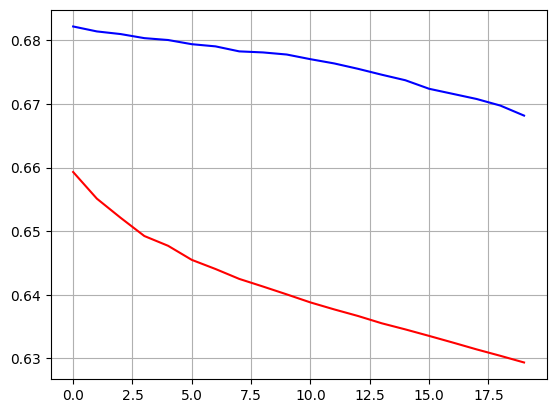

In [71]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by adding additional dense on Neural network we achive around 0.65 of loss while training we achived 0.62.

# 3) Changing activation function as 'ReLU'

In [72]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='relu',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='relu')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6538 - loss: 0.6287 - val_accuracy: 0.5975 - val_loss: 0.6614
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.6156 - val_accuracy: 0.6101 - val_loss: 0.6503
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.5990 - val_accuracy: 0.6101 - val_loss: 0.6403
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.5941 - val_accuracy: 0.6164 - val_loss: 0.6308
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - loss: 0.5840 - val_accuracy: 0.6164 - val_loss: 0.6222
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.5807 - val_accuracy: 0.6164 - val_loss: 0.6137
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7006 - loss: 0.5584 - val_accuracy: 0.6226 - val_loss: 0.6062
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6914 - loss: 0.5616 - val_accuracy: 0.6289 - val_loss: 0.5994
Epo

{'accuracy': [0.6684635877609253,
  0.6738544702529907,
  0.6738544702529907,
  0.6765498518943787,
  0.6792452931404114,
  0.6819406747817993,
  0.6792452931404114,
  0.6792452931404114,
  0.6792452931404114,
  0.6927223801612854,
  0.6954177618026733,
  0.7088949084281921,
  0.7115902900695801,
  0.7061994671821594,
  0.7169811129570007,
  0.7250673770904541,
  0.7250673770904541,
  0.7277628183364868,
  0.7304581999778748,
  0.7385444641113281],
 'loss': [0.6273834109306335,
  0.6153873801231384,
  0.6043710112571716,
  0.5938438773155212,
  0.5851102471351624,
  0.5759374499320984,
  0.5679434537887573,
  0.5598090887069702,
  0.5532426238059998,
  0.5465917587280273,
  0.5410481095314026,
  0.5357373356819153,
  0.5310366749763489,
  0.5261843800544739,
  0.5218990445137024,
  0.5176892876625061,
  0.5142630338668823,
  0.5105525851249695,
  0.5074743032455444,
  0.5042096376419067],
 'val_accuracy': [0.597484290599823,
  0.6100628972053528,
  0.6100628972053528,
  0.6163522005081

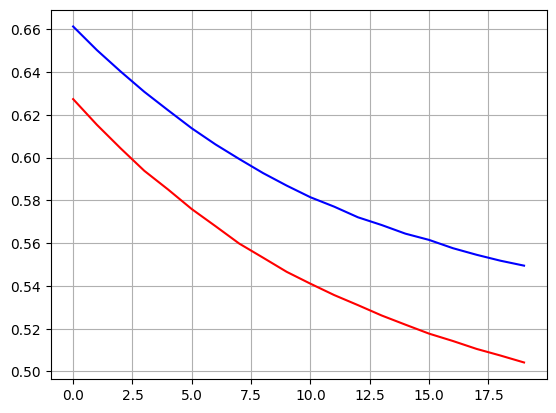

In [73]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by changing activation function layer on Neural network we achive around 0.56 of loss while testing phase. This is better than previous two hypothesize.

# 4) Changing Loss Function with 'mean_squared_error'

In [74]:
# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='relu',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='relu')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6888 - loss: 0.1981 - val_accuracy: 0.5975 - val_loss: 0.2184
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - loss: 0.2077 - val_accuracy: 0.5975 - val_loss: 0.2150
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - loss: 0.1903 - val_accuracy: 0.6038 - val_loss: 0.2123
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6610 - loss: 0.2018 - val_accuracy: 0.6038 - val_loss: 0.2096
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.1826 - val_accuracy: 0.6038 - val_loss: 0.2073
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 0.1924 - val_accuracy: 0.6038 - val_loss: 0.2053
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6781 - loss: 0.1878 - val_accuracy: 0.6038 - val_loss: 0.2031
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6758 - loss: 0.1850 - val_accuracy: 0.6038 - val_loss: 0.2007
Epo

{'accuracy': [0.6684635877609253,
  0.671159029006958,
  0.6684635877609253,
  0.6684635877609253,
  0.6684635877609253,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6684635877609253,
  0.671159029006958,
  0.698113203048706,
  0.7223719954490662,
  0.7277628183364868,
  0.7358490824699402,
  0.7358490824699402,
  0.7358490824699402],
 'loss': [0.2042510211467743,
  0.19976437091827393,
  0.19663932919502258,
  0.19409283995628357,
  0.19209164381027222,
  0.1902627795934677,
  0.18870672583580017,
  0.18728852272033691,
  0.18584656715393066,
  0.18448719382286072,
  0.18326261639595032,
  0.18230168521404266,
  0.18105484545230865,
  0.17987798154354095,
  0.1787850260734558,
  0.1776932328939438,
  0.17681030929088593,
  0.17581495642662048,
  0.17491410672664642,
  0.17410679161548615],
 'val_accuracy': [0.597484290599823,
  0.597484290599823,
  0.6037735939025879,
  0.6

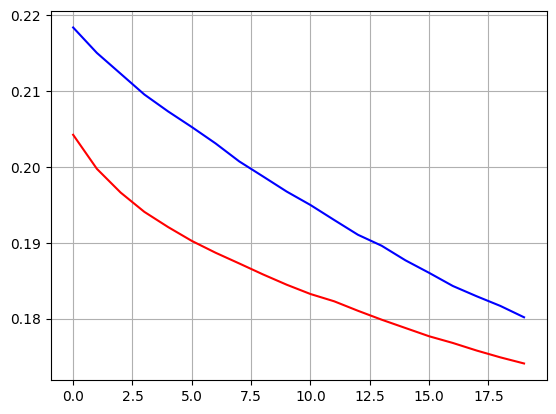

In [75]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- So, by replacing activation function with 'mean_squared_error' we achivedaround 0.18 of loss which is better than all the hypothesize.
- In this, we have additional hidden layers, additional denses, ReLU as activation function, and 'mean_squared_error' as loss function.  

# Part 2 : PyTorch ---------------------------------------------------------

In [77]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


# Step 1 : import the dataset

In [78]:
data = pd.read_csv('diabetes.csv')
data.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

# Step 2: Preprocessing the Data & Visualization

In [79]:
# We dont have column names, so adding header to them
data = data.set_axis(['fr1','fr2','fr3','fr4','fr5','fr6','fr7','fr9','target'],axis=1)

In [80]:
data.head()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [81]:
data.describe()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
data.isnull().sum()

fr1       0
fr2       0
fr3       0
fr4       0
fr5       0
fr6       0
fr7       0
fr9       0
target    0
dtype: int64

In [83]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
753    False
754    False
755    False
756    False
757    False
Length: 758, dtype: bool

array([[<Axes: title={'center': 'fr1'}>, <Axes: title={'center': 'fr2'}>,
        <Axes: title={'center': 'fr3'}>],
       [<Axes: title={'center': 'fr4'}>, <Axes: title={'center': 'fr5'}>,
        <Axes: title={'center': 'fr6'}>],
       [<Axes: title={'center': 'fr7'}>, <Axes: title={'center': 'fr9'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

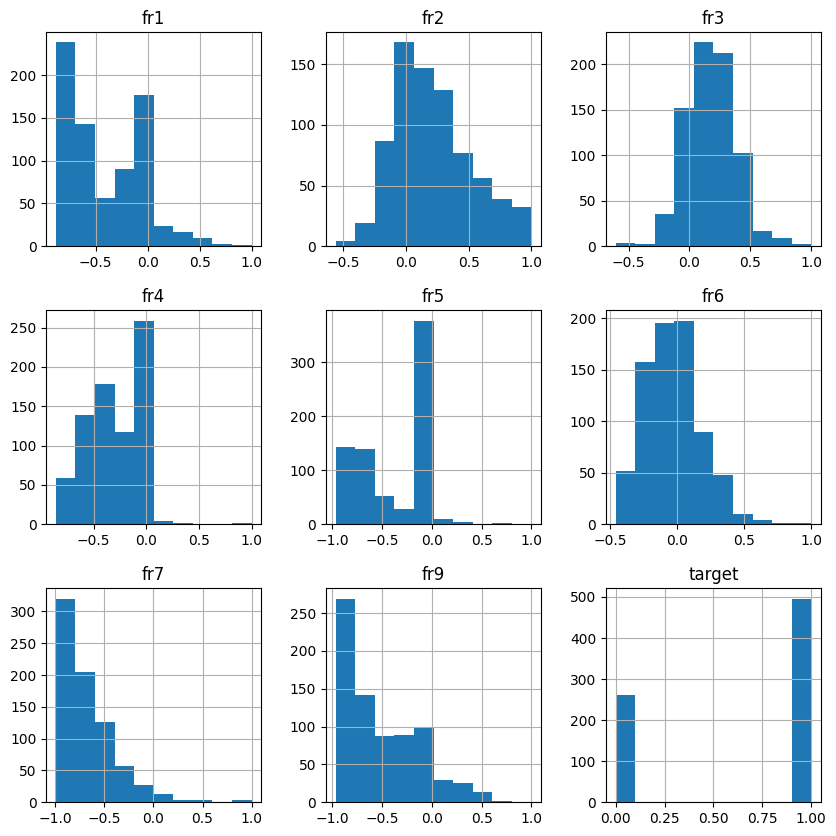

In [85]:
# we have already described many data visualization in Part 1.
data.hist(figsize=(10,10))

# Step 3: Split into 70% train 30% test

In [86]:
# Data needs to be scaled.
from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_trained_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


x_trained_scaled

array([[-0.01924968, -0.22083283,  0.34204625, ..., -0.19423045,
        -0.37066807,  0.70479237],
       [-1.23740727, -1.4535344 , -1.27872991, ...,  0.11026748,
         2.3178001 , -0.97630421],
       [ 0.28528972, -1.19401862,  0.50412426, ..., -0.19423045,
        -0.2551938 ,  0.53668195],
       ...,
       [-1.23740727, -0.72364506, -1.92704097, ..., -1.1367224 ,
        -0.97172368, -1.14441462],
       [ 1.04663951, -0.57766751,  0.34204625, ..., -2.05021917,
         0.3369789 , -0.72413985],
       [-0.62832848,  1.88773208, -0.63042034, ...,  0.21176676,
        -0.5838508 , -0.8081938 ]])

# Step 4: Modify the model 


# Step 5: Train the model on the data

# Step 6: Model is ready for prediction

# Step 7: Model Accuracy Calculation